# UMAP
## Uniform Manifold Approximation and Projection for Dimension Reduction

Source material:   
Tutorial: https://umap-learn.readthedocs.io/en/latest/  
Paper: https://arxiv.org/abs/1802.03426 

Notebook adapted from Anna Poetsch ([source](https://github.com/BiAPoL/Bio-image_Analysis_with_Python/tree/main/10_correlation_dim_reduction)) under [CC-BY-4.0](https://github.com/BiAPoL/Bio-image_Analysis_with_Python/blob/main/LICENSE-CC-BY)

Packages (if not available, pip install):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
import pandas as pd

Load data:

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Show data:

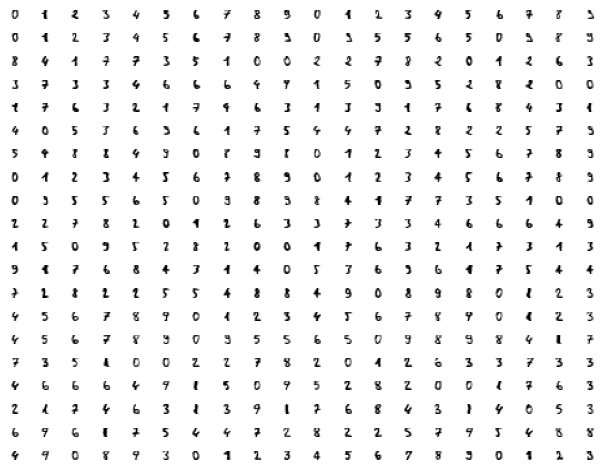

In [3]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=1, w_pad=0.01)

As you can see these are quite low resolution images – for the most part they are recognisable as digits, but there are a number of cases that are sufficiently blurred as to be questionable even for a human to guess at. The zeros do stand out as the easiest to pick out as notably different and clearly zeros. Beyond that things get a little harder: some of the squashed thing eights look awfully like ones, some of the threes start to look a little like crossed sevens when drawn badly, and so on.

Each image can be unfolded into a 64 element long vector of grayscale values. It is these 64 dimensional vectors that we wish to analyse: how much of the digits structure can we discern? At least in principle 64 dimensions is overkill for this task, and we would reasonably expect that there should be some smaller number of “latent” features that would be sufficient to describe the data reasonably well. We can try a scatterplot matrix – in this case just of the first 10 dimensions so that it is at least plottable, but as you can quickly see that approach is not going to be sufficient for this data.

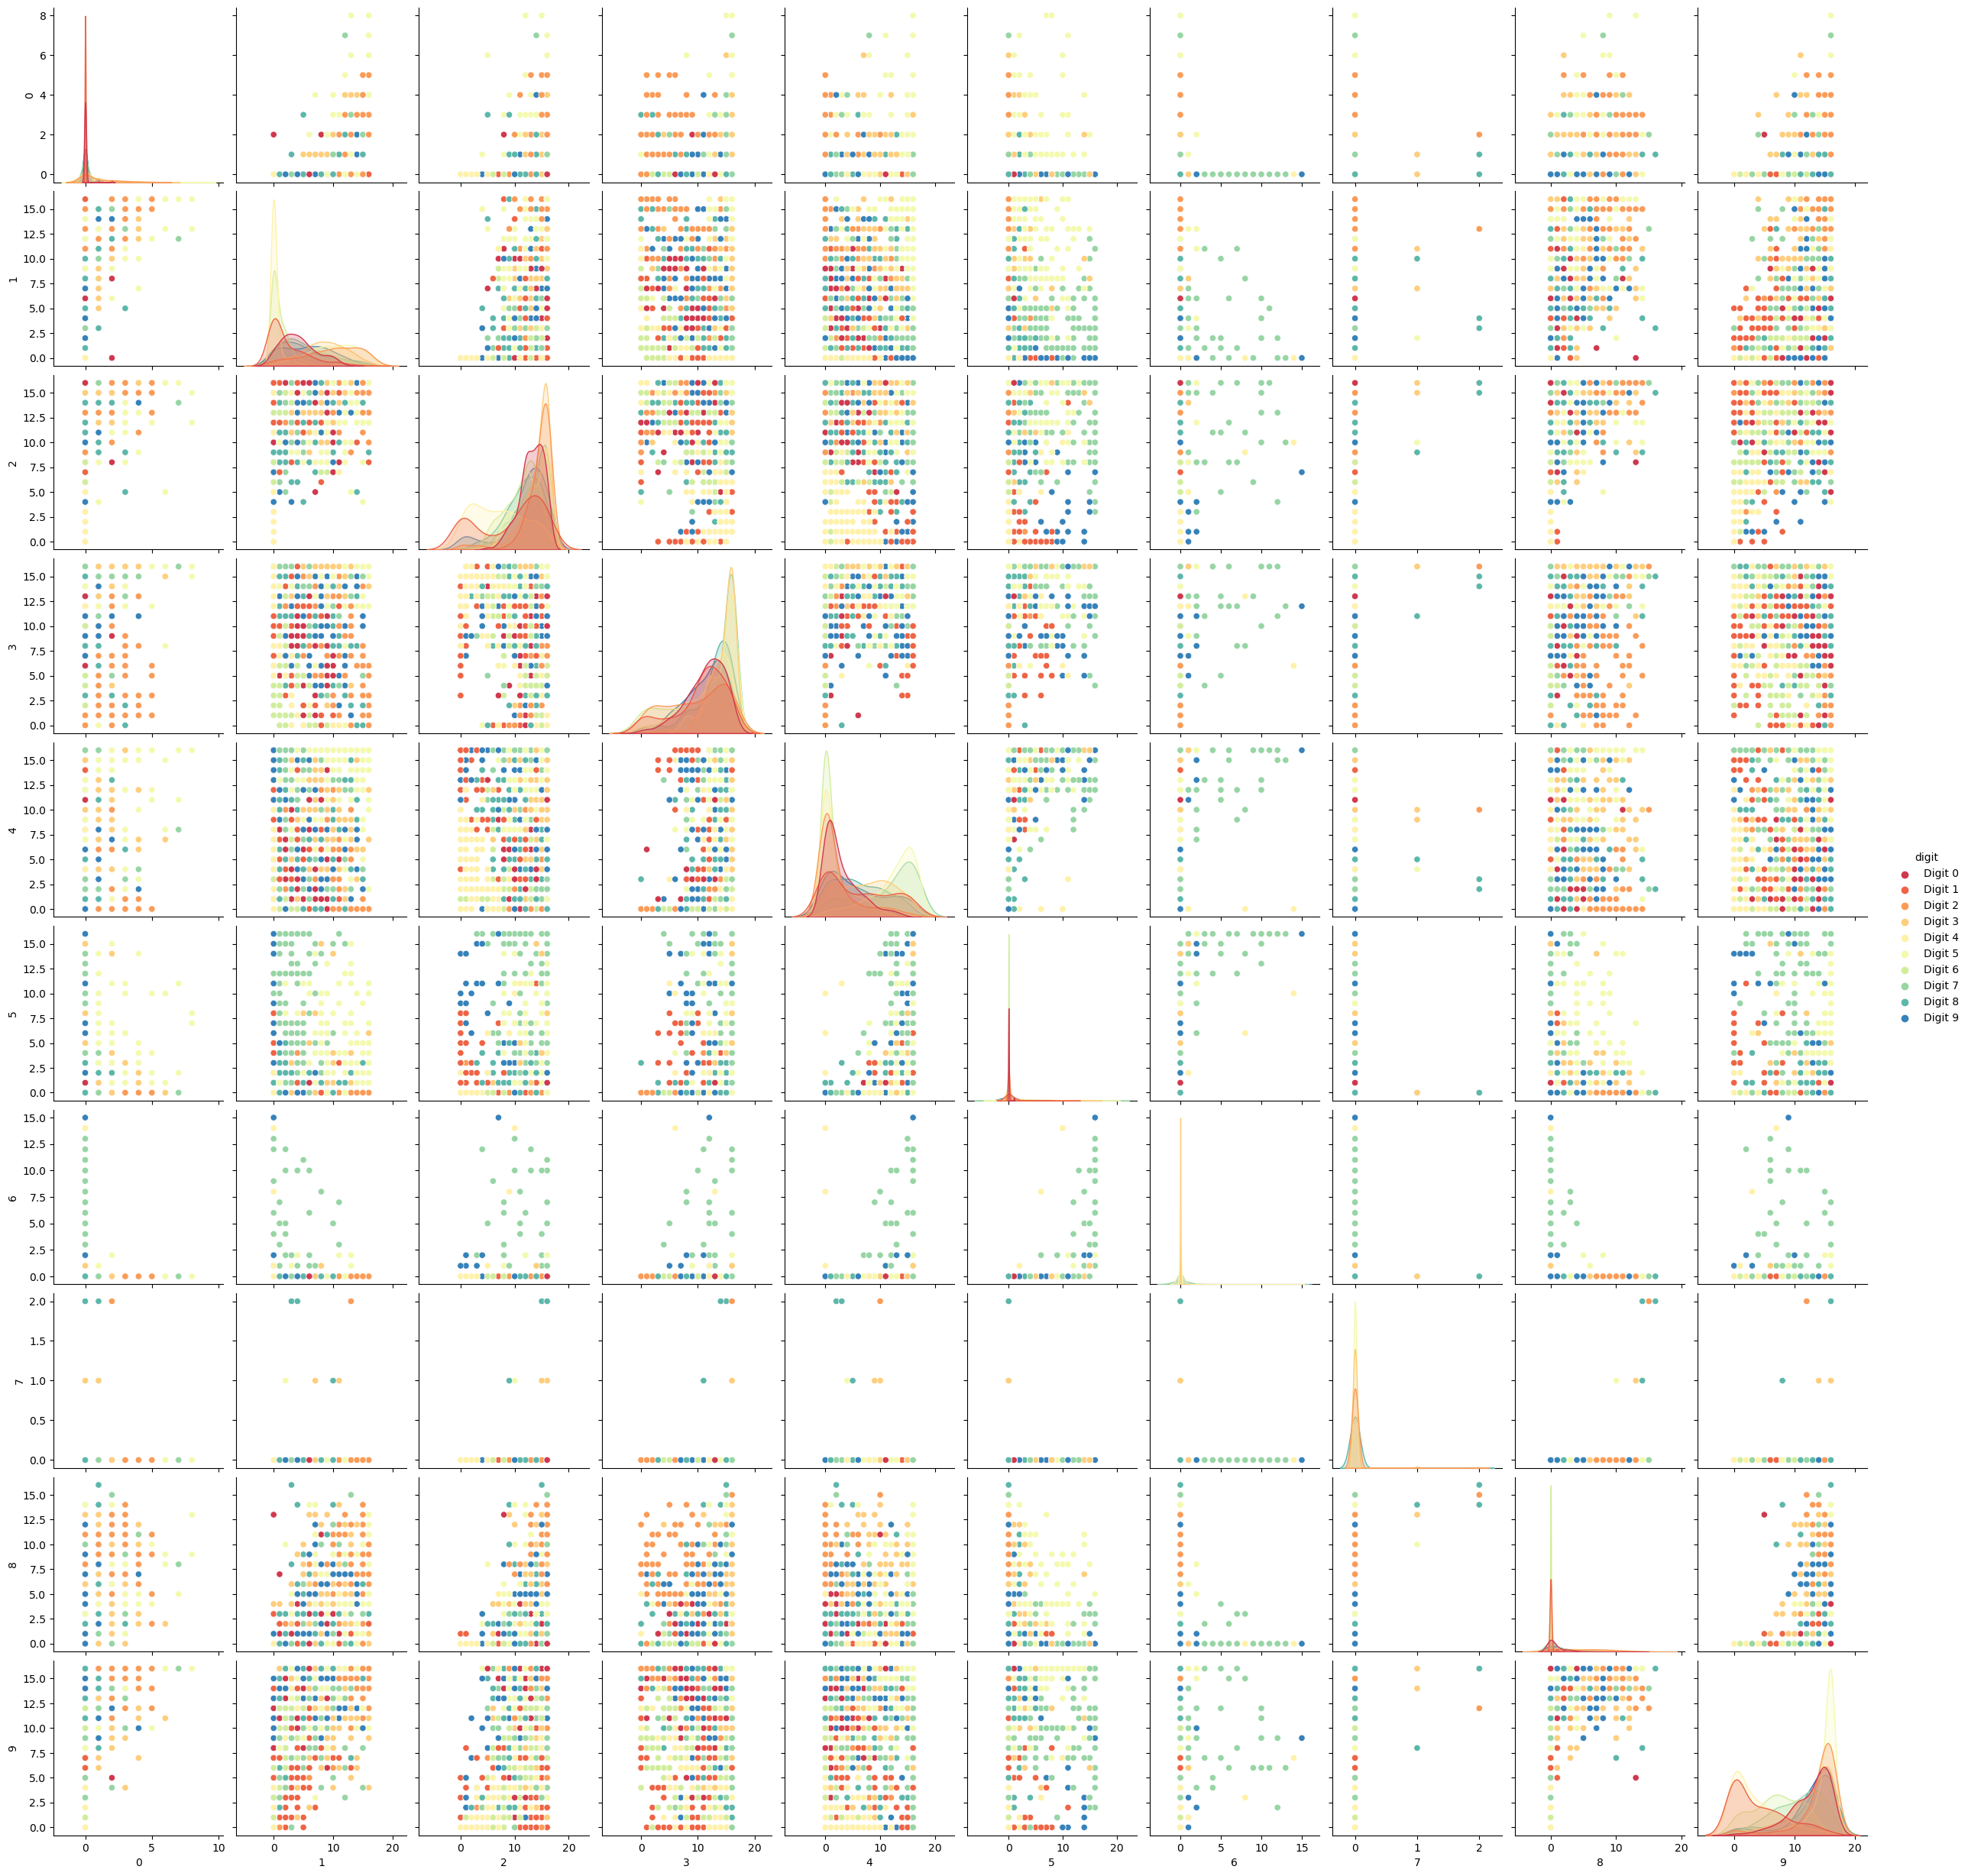

In [4]:
digits_df = pd.DataFrame(digits.data[:,1:11])
# digits_df.head(100)
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral');

In contrast we can try using UMAP again. It works exactly as before: construct a model, train the model, and then look at the transformed data. To demonstrate more of UMAP we’ll go about it differently this time and simply use the `fit` method rather than the `fit_transform` approach we used for Penguins.

In [5]:
import umap

In [6]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [7]:
umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

UMAP(low_memory=False, random_state=42)

In [8]:
umap.UMAP?

Init signature:
umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='euclidean',
    metric_kwds=None,
    output_metric='euclidean',
    output_metric_kwds=None,
    n_epochs=None,
    learning_rate=1.0,
    init='spectral',
    min_dist=0.1,
    spread=1.0,
    low_memory=True,
    n_jobs=-1,
    set_op_mix_ratio=1.0,
    local_connectivity=1.0,
    repulsion_strength=1.0,
    negative_sample_rate=5,
    transform_queue_size=4.0,
    a=None,
    b=None,
    random_state=None,
    angular_rp_forest=False,
    target_n_neighbors=-1,
    target_metric='categorical',
    target_metric_kwds=None,
    target_weight=0.5,
    transform_seed=42,
    transform_mode='embedding',
    force_approximation_algorithm=False,
    verbose=False,
    tqdm_kwds=None,
    unique=False,
    densmap=False,
    dens_lambda=2.0,
    dens_frac=0.3,
    dens_var_shift=0.1,
    output_dens=False,
    disconnection_distance=None,
    precomputed_knn=(None, None, None),
)
Docstring:     
Uniform Manifold

Now, instead of returning an embedding we simply get back the reducer object, now having trained on the dataset we passed it. To access the resulting transform we can either look at the embedding_ attribute of the reducer object, or call transform on the original data.

In [9]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

We now have a dataset with 1797 rows (one for each hand-written digit sample), but only 2 columns. As with the Penguins example we can now plot the resulting embedding, coloring the data points by the class that they belong to (i.e. the digit they represent).

C:\Users\thewo\AppData\Local\Temp\ipykernel_8616\2185932026.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)


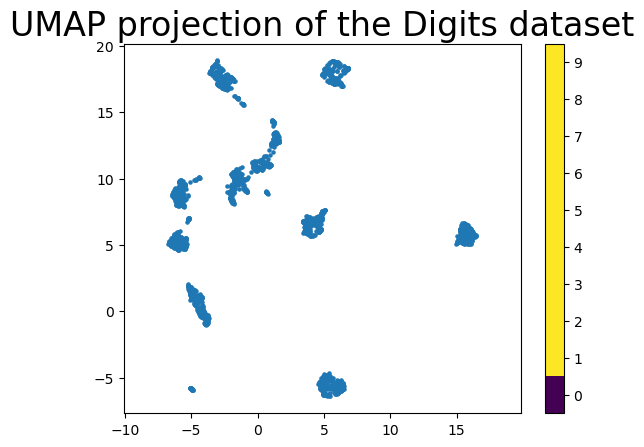

In [10]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

We see that UMAP has successfully captured the digit classes. There are also some interesting effects as some digit classes blend into one another (see the eights, ones, and sevens, with some nines in between), and also cases where digits are pushed away as clearly distinct (the zeros on the right, the fours at the top, and a small subcluster of ones at the bottom come to mind). To get a better idea of why UMAP chose to do this it is helpful to see the actual digits involve.